<a href="https://colab.research.google.com/github/Ghadiiz/movie-sentiment-analyzer-nlp/blob/main/Movie_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
def setup_nlp_environment():
    """Imports common NLP libraries and downloads NLTK data packages."""
    print("Importing necessary libraries...")
    try:
        import pandas as pd
        import numpy as np
        import matplotlib.pyplot as plt
        import seaborn as sns
        import nltk
        from sklearn.model_selection import train_test_split
        from sklearn.feature_extraction.text import TfidfVectorizer
        from sklearn.naive_bayes import MultinomialNB
        from sklearn.metrics import classification_report, accuracy_score
        try:
            import tensorflow as tf
            from tensorflow import keras
        except ImportError:
            print("TensorFlow/Keras not found. Skipping import.")

        print("Libraries imported successfully.")

        print("Downloading NLTK data packages...")
        nltk.download('stopwords', quiet=True)
        nltk.download('punkt', quiet=True)
        nltk.download('wordnet', quiet=True)
        nltk.download('omw-1.4', quiet=True) # Open Multilingual WordNet, often needed with wordnet
        print("NLTK data packages downloaded successfully.")

        # Optional: Set up plotting style
        sns.set_style("whitegrid")
        plt.rcParams['figure.figsize'] = [10, 6]

    except ImportError as e:
        print(f"Error importing a library: {e}. Please ensure all libraries are installed.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Call the function to set up the environment
setup_nlp_environment()

Importing necessary libraries...
Libraries imported successfully.
NLTK data packages downloaded successfully.


In [6]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import imdb

# 1. Load the IMDB dataset
# num_words parameter keeps the most frequent words
max_features = 10000  # consider only top 10k words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 2. Get the word index and create a reverse word index
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# The indices are offset by 3 because 0, 1, and 2 are reserved for "padding," "start of sequence," and "unknown."
# Define a decoding function
def decode_review(text_sequence):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text_sequence])

# 3. Convert integer sequences back to text reviews
train_reviews_text = [decode_review(seq) for seq in x_train]
test_reviews_text = [decode_review(seq) for seq in x_test]

# 4. Create pandas DataFrames
# Combine train and test data
reviews = train_reviews_text + test_reviews_text
sentiments = np.concatenate((y_train, y_test), axis=0)

imdb_df = pd.DataFrame({'review': reviews, 'sentiment': sentiments})

# Map sentiment labels to 'positive' and 'negative' for clarity if desired
# imdb_df['sentiment'] = imdb_df['sentiment'].map({0: 'negative', 1: 'positive'})

# 5. Display the first few rows, DataFrame shape, and data types
print("\n--- IMDB Dataset DataFrame ---")
print("First 5 rows:")
print(imdb_df.head())

print(f"\nDataFrame shape: {imdb_df.shape}")

print("\nDataFrame info:")
imdb_df.info()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

--- IMDB Dataset DataFrame ---
First 5 rows:
                                              review  sentiment
0  ? this film was just brilliant casting locatio...          1
1  ? big hair big boobs bad music and a giant saf...          0
2  ? this has to be one of the worst films of the...          0
3  ? the ? ? at storytelling the traditional sort...          1
4  ? worst mistake of my life br br i picked this...          0

DataFrame shape: (50000, 2)

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB



--- Exploratory Data Analysis on IMDB Dataset ---

1. Sentiment Distribution:


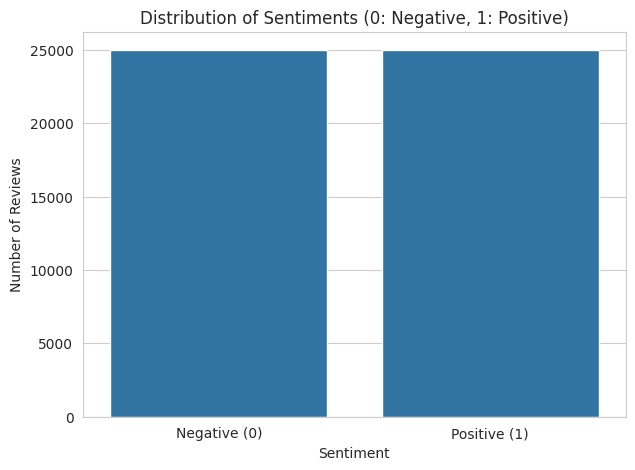


2. Review Length Distribution:


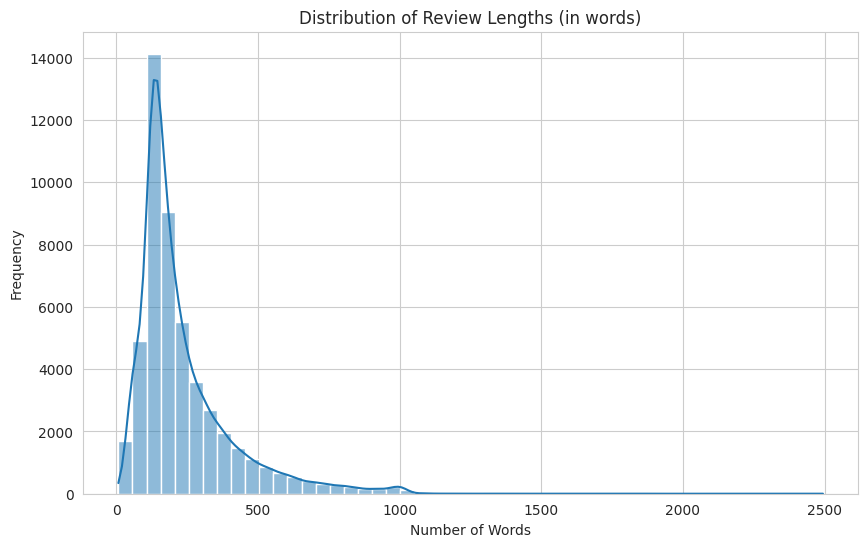


3. Missing Values Check:
review           0
sentiment        0
review_length    0
dtype: int64

4. Five Random Sample Reviews:

Sentiment: Positive
Review: ? is a good movie but we recognize too much from other movies in its genre and ? it lacks originality if you have seen ? ? ? ? and a bunch of other movies that were inspired by that last one you have seen almost every part from there is a scene that involves torturing that has even the same dialogue as in ? ? br br still it is a good movie because not every part is taken from the same movie the complete thing has some new ideas and some nice touches the opening sequence to begin with is quite impressive we meet nick aaron dallas and billy hill james le they get into a fight with a clerk in a gas station over a cup of coffee and it ends with the death of that clerk and the arrival of a cop we've already ? at a ? with a lot of money in it br br then we meet ? thomas jane in ? he is married to christine paula marshall but used to be w

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("\n--- Exploratory Data Analysis on IMDB Dataset ---")

# 1) Bar chart showing count of positive vs negative reviews
print("\n1. Sentiment Distribution:")
plt.figure(figsize=(7, 5))
sns.countplot(x='sentiment', data=imdb_df)
plt.title('Distribution of Sentiments (0: Negative, 1: Positive)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks([0, 1], ['Negative (0)', 'Positive (1)'])
plt.show()

# 2) Histogram showing distribution of review lengths in words
print("\n2. Review Length Distribution:")
# Calculate review lengths
imdb_df['review_length'] = imdb_df['review'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.histplot(imdb_df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths (in words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# 3) Check for missing values
print("\n3. Missing Values Check:")
print(imdb_df.isnull().sum())

# 4) Display 5 random sample reviews with their sentiments
print("\n4. Five Random Sample Reviews:")
for index, row in imdb_df.sample(5).iterrows():
    print(f"\nSentiment: {'Positive' if row['sentiment'] == 1 else 'Negative'}")
    print(f"Review: {row['review']}")

# Drop the temporary 'review_length' column if no longer needed
imdb_df = imdb_df.drop(columns=['review_length'])